# Steps #

0. Decide on problem
1. Read training imge features
    - decide on feature
    - decide on representation
2. Classify
    - decide on distance measure
    - decide on classifier
3. Visualize results

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, exposure, transform
import pandas as pd

In [2]:
path = 'cards'
trainpath = path + '/train'
validationpath = path + '/valid'
testpath = path + '/test'
data = pd.read_csv(path + '/cards.csv')
data.head(10)


,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train
5,0,train/ace of clubs/006.jpg,ace of clubs,ace,train
6,0,train/ace of clubs/007.jpg,ace of clubs,ace,train
7,0,train/ace of clubs/008.jpg,ace of clubs,ace,train
8,0,train/ace of clubs/009.jpg,ace of clubs,ace,train
9,0,train/ace of clubs/010.jpg,ace of clubs,ace,train


In [3]:
label_types = data.labels.unique()
label_types

array(['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'joker', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',

In [4]:
trainfilelist = data[data['data set']=='train']
validfilelist = data[data['data set']=='valid']
testfilelist = data[data['data set']=='test']

print(trainfilelist.shape)
print(validfilelist.shape)
print(testfilelist.shape)

(7624, 5)
(265, 5)
(265, 5)


In [5]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


def colorHistogram(image):
    image = imNormalize(image)
    h1 = exposure.histogram(image[:,:,0])
    h2 = exposure.histogram(image[:,:,1])
    h3 = exposure.histogram(image[:,:,2])
    h = np.concatenate((h1[0],h2[0],h3[0]), axis = None)
    h = h / (image.shape[0]*image.shape[1])
    return h

In [6]:
trainfeatures = []
validfeatures = []
testfeatures = []

print('Reading training features...')
for file in trainfilelist.filepaths:
    image = io.imread(path + '/' + file)
    # fd = colorHistogram(image)
    image = transform.resize(image, [256,256])
    image = imNormalize(image)
    fd = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                  cells_per_block=(1, 1), visualize=False, feature_vector=True, channel_axis=2)

    trainfeatures.append(fd)
    print('.', end='')

print()

trainfeatures = np.array(trainfeatures)
trainlabels = np.array(trainfilelist['class index'])
print('Reading validation features...')
for file in validfilelist.filepaths:
    image = io.imread(path + '/' + file)
    # fd = colorHistogram(image)
    image = transform.resize(image, [256,256])
    image = imNormalize(image)
    fd = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                  cells_per_block=(1, 1), visualize=False, feature_vector=True, channel_axis=2)

    validfeatures.append(fd)
    print('.', end='')

print()

validfeatures = np.array(validfeatures)
validlabels = np.array(validfilelist['class index'])

print('Reading test features...')
for file in testfilelist.filepaths:
    image = io.imread(path + '/' + file)
    # fd = colorHistogram(image)
    image = transform.resize(image, [256,256])
    image = imNormalize(image)
    fd = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                  cells_per_block=(1, 1), visualize=False, feature_vector=True, channel_axis=2)
        
    testfeatures.append(fd)
    print('.', end='')

print()

testfeatures = np.array(testfeatures)
testlabels = np.array(testfilelist['class index'])

print(trainfeatures.shape, trainlabels.shape)
print(validfeatures.shape, validlabels.shape)
print(testfeatures.shape, testlabels.shape)




Reading training features...
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [9]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(trainfeatures,trainlabels)
print(model)

/Users/banerji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()


/Users/banerji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
print('Training score=',model.score(trainfeatures,trainlabels))
print('Validation score=',model.score(validfeatures,validlabels))
print('Test score=',model.score(testfeatures, testlabels))

Training score= 0.9998688352570829
Validation score= 0.6339622641509434
Test score= 0.6113207547169811


In [10]:
from sklearn import discriminant_analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

categories = data['class index'].unique()
NUMCLASSES = len(categories)

def do_efm(traindata, testdata, trainlabels, pca_dimensions = -1, fld_dimensions=-1):
    if pca_dimensions < 1 or pca_dimensions >= traindata.shape[1]:
        pca_dimensions = traindata.shape[1] - 1
    
    if fld_dimensions < 1 or fld_dimensions > (NUMCLASSES-1):
        fld_dimensions = NUMCLASSES - 1
        
    # First normalize
    scaler = StandardScaler()
    normtrain = scaler.fit_transform(traindata)
    normtest = scaler.transform(testdata)

    # Then do PCA
    pca = PCA(n_components = pca_dimensions, whiten=True)
    lowtrain = pca.fit_transform(normtrain)
    lowtest = pca.transform(normtest)

    # Now do FLD
    lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=fld_dimensions)
    newtrain = lda.fit_transform(lowtrain,trainlabels)
    newtest = lda.transform(lowtest)

    return [newtrain, newtest]

In [11]:
[newtrain, newtest] = do_efm(trainfeatures, testfeatures, trainlabels, 
                             pca_dimensions=450, fld_dimensions=50)
print(newtrain.shape)
print(newtest.shape)

(7624, 50)
(265, 50)


In [12]:
classmeans = np.zeros([NUMCLASSES, newtrain.shape[1]]) 
for label in range(NUMCLASSES):
    temp = newtrain[(trainlabels == label),:]
    classmeans[label,:] = np.mean(temp, axis=0)

classmeans.shape

(53, 50)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Modified efm-nn with the class means
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(classmeans, range(NUMCLASSES))
preds = neigh.predict(newtest)
# neigh.score(newtest, testlabels)

# # efm-knn (doesn't work too well)
# neigh = KNeighborsClassifier(n_neighbors=15)
# neigh.fit(newtrain, trainlabels)
# preds = neigh.predict(newtest)
# # neigh.score(newtest, testlabels)


Success Rate =  0.6754716981132076


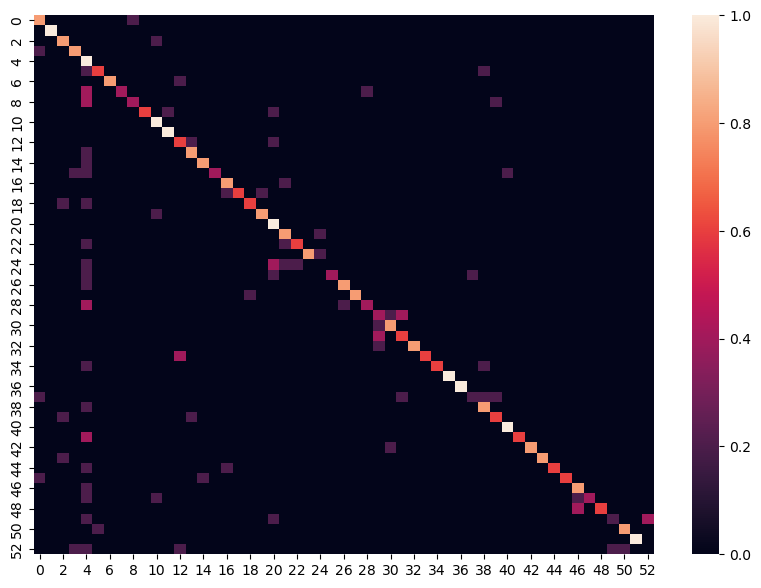

In [14]:
#Visualize performance by Normalized confusion matrix
import seaborn as sn

conf = np.zeros([NUMCLASSES,NUMCLASSES])

for item in range(len(testlabels)):
    real = testlabels[item]
    guess = preds[item]
    conf[real,guess] = conf[real,guess] + 1
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[NUMCLASSES,1])
rowsums = np.repeat(rowsums,NUMCLASSES, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [i for i in range(NUMCLASSES)],
                  columns = [i for i in range(NUMCLASSES)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=False)

print("Success Rate = ", np.mean(conf.diagonal()))